In [36]:
from imp4nb import *
import pandas as pd, sqlite3 as lite
cnx = lite.connect('data\\quandan.db')
# df = pd.read_sql('select * from fileread',cnx)
# sql = "update quandan set 无货金额 = NULL where 无货金额 like '%s'" %('.') #把无货金额字段中非法字符做妥善处理
# print(sql)
# result = cnx.cursor().execute(sql)
# print(result)
# cnx.commit()
# sql = "select * from quandan where 无货金额 like '%s'" %('.')
# print(sql)
try:
    df = pd.read_sql("select * from quandan",cnx) 
    df = df[df.配货人 != '作废']
    df['订单日期'] = pd.to_datetime(df['订单日期'])
    df['送达日期'] = pd.to_datetime(df['送达日期'])
    df['收款日期'] = pd.to_datetime(df['收款日期'])
except:
    pass

# descdb(df)

# dfpeihuoren= pd.read_sql("select 配货人 from quandan group by 配货人",cnx)
# descdb(dfpeihuoren)
dd = pd.DataFrame(df.groupby(['订单日期']).size(),columns=['订单数量'])
dd['订单金额'] = df.groupby(['订单日期']).sum()['送货金额']
print(dd)

ph = pd.DataFrame(df.groupby(['配货人']).size())
ph.columns = ['配单']
ph['配错'] = df.groupby(['配货人']).sum()['配货准确']

print(ph)

cnx.close()



            订单数量      订单金额
订单日期                      
2010-11-04     1    112.00
2010-11-09     1     69.00
2010-11-10     1     74.00
2010-11-14     1    109.00
2010-11-18     1     81.80
2010-11-25     1     64.40
2010-11-29     1    108.50
2010-12-02     1     52.00
2010-12-04     2    151.50
2010-12-07     1     79.00
2010-12-08     1    127.00
2010-12-10     1    124.00
2010-12-13     1    103.00
2010-12-16     2    137.50
2010-12-19     1     96.00
2010-12-21     1    129.00
2010-12-23     1     58.50
2010-12-28     1     64.00
2011-01-01     1     33.30
2011-01-05     1     28.00
2011-01-19     1    200.00
2011-01-21     2    242.00
2011-01-23     1     28.80
2011-01-28     1     24.00
2011-01-29     1    120.00
2011-02-02     1    100.00
2011-02-18     1    200.00
2011-02-19     1     52.50
2011-02-20     1    180.00
2011-03-01     1     47.70
...          ...       ...
2017-11-03   107  31250.00
2017-11-04    73  20896.40
2017-11-06   105  59865.30
2017-11-07   122  59407.00
2

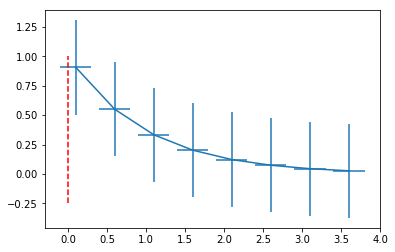

None


In [8]:
"""
=============================
Demo of the errorbar function
=============================

This exhibits the most basic use of the error bar method.
In this case, constant values are provided for the error
in both the x- and y-directions.
"""
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
ax.plot([0,0],[-0.25,1],'r--')
plt.show()

print(plt.colors())

In [4]:
dd = range(1,30+1,2)
print(type(dd))
print(list(dd))

<class 'range'>
[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]
